# 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [2]:
import pandas as pd
import numpy as np                # Numerical Python; Arrays ; Multi dimentional objects
import matplotlib.pyplot as plt   # creating static, animated, and interactive visualizations in Python
import datetime as dt
import seaborn as sns     # data visualization library
import re                 # Regular Expressions

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

In [4]:
trans = pd.read_csv("Transactions.csv")
trans

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [5]:
prod = pd.read_csv("prod_cat_info.csv")
prod

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [6]:
cust = pd.read_csv("Customer.csv")
cust

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [9]:
merge1 = pd.merge(left = cust, right = trans, how = 'inner', left_on = 'customer_Id', right_on = 'cust_id')
merge1

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,268408,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,16197868036,268408,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,28810141075,268408,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,64633435931,268408,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,27-12-1992,F,5.0,71369029396,269626,18-10-2011,12,6,1,638,66.990,704.990,e-Shop
23049,269626,27-12-1992,F,5.0,94134051896,269626,7/7/2011,3,1,3,1078,339.570,3573.570,MBR
23050,274308,29-12-1992,F,5.0,26208690928,274308,22-10-2012,1,2,2,898,188.580,1984.580,MBR
23051,274308,29-12-1992,F,5.0,57358822237,274308,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop


In [10]:
Customer_Final = pd.merge(left = merge1, right = prod, how = 'inner', left_on = ("prod_cat_code","prod_subcat_code"), right_on = ("prod_cat_code", "prod_sub_cat_code"))
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,04-12-1992,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction


In [11]:
Customer_Final.drop_duplicates(inplace=True)

In [9]:
Customer_Final = Customer_Final.drop(columns=["cust_id","prod_sub_cat_code"])

In [10]:
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,04-12-1992,F,1.0,63540378797,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction


# 2. Prepare a summary report for the merged data set

 a. Get the column names and their corresponding data types

In [11]:
Customer_Final.dtypes

customer_Id           int64
DOB                  object
Gender               object
city_code           float64
transaction_id        int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
dtype: object

 b. Top/Bottom 10 observations

In [13]:
Customer_Final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23043,268914,15-11-1992,F,3.0,1407823655,10/6/2011,10,5,1,1252,131.460,1383.460,MBR,Books,Non-Fiction
23044,269519,17-11-1992,M,9.0,29719500605,24-12-2013,10,5,4,1036,435.120,4579.120,TeleShop,Books,Non-Fiction
23045,273524,25-11-1992,F,1.0,25762805863,19-11-2012,10,5,1,1401,147.105,1548.105,Flagship store,Books,Non-Fiction
23046,272141,02-12-1992,F,10.0,71337087467,22-07-2012,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,Non-Fiction
23047,272141,02-12-1992,F,10.0,71337087467,16-07-2012,10,5,3,1422,447.930,4713.930,e-Shop,Books,Non-Fiction
23048,267812,04-12-1992,F,1.0,63540378797,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction
23052,268097,15-12-1992,F,7.0,90114483354,26-01-2011,10,5,4,1408,591.360,6223.360,e-Shop,Books,Non-Fiction


c) “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [15]:
Customer_Final["total_amt"].describe()

count    23040.000000
mean      2109.865226
std       2505.610295
min      -8270.925000
25%        762.450000
50%       1756.950000
75%       3570.255000
max       8287.500000
Name: total_amt, dtype: float64

d) Frequency tables for all the categorical variables

In [17]:
#two ways
# First method
Customer_Final.loc[:,Customer_Final.dtypes=="object"].describe()

,DOB,Gender,tran_date,Store_type,prod_cat,prod_subcat
count,23040,23031,23040,23040,23040,23040
unique,3987,2,1129,4,6,18
top,27-12-1988,M,13-07-2011,e-Shop,Books,Women
freq,32,11804,35,9304,6066,3046


In [22]:
# second method
pd.crosstab(index=Customer_Final.Gender,columns="count")

col_0,count
Gender,
F,11227
M,11804


# 3. Generate histograms for all continuous variables and frequency bars for categorical variables

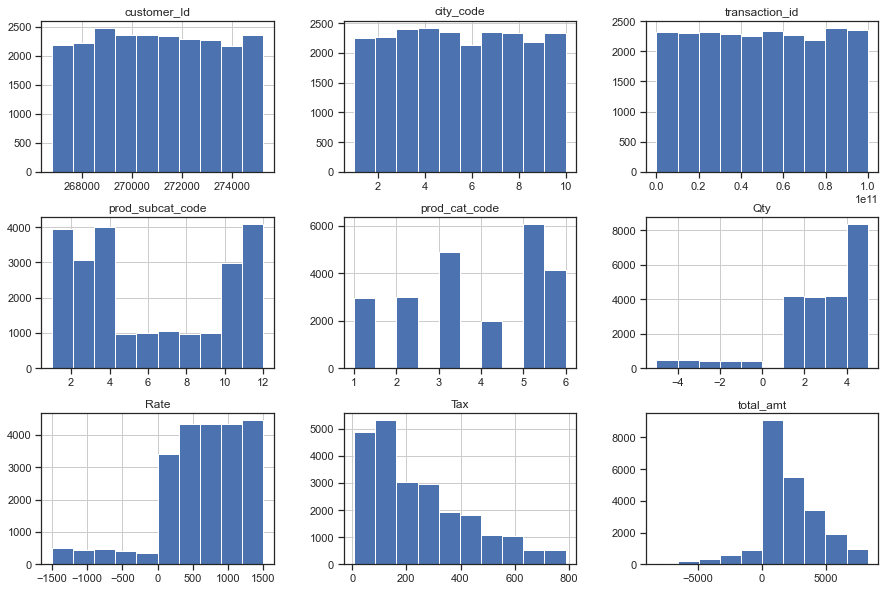

In [31]:
Customer_Final.hist(figsize=(15,10))
plt.grid()
plt.show()

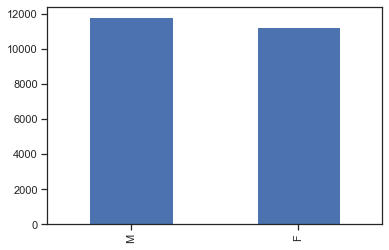

In [40]:
Customer_Final["Gender"].value_counts().plot(kind ="bar")
plt.show()

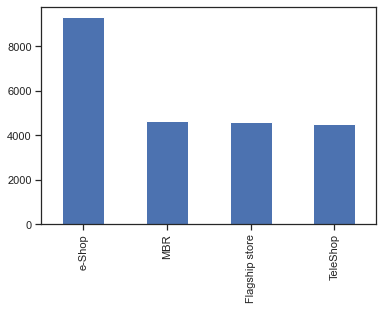

In [45]:
Customer_Final["Store_type"].value_counts().plot(kind ="bar")
plt.show()

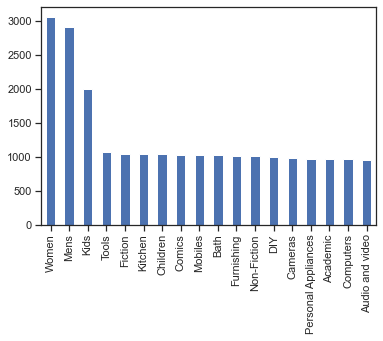

In [46]:
Customer_Final["prod_subcat"].value_counts().plot(kind ="bar")
plt.show()

# 4 . Calculate the following information using the merged dataset :

# Time period of the available transaction data

In [47]:
Customer_Final["tran_date"]

0        13-01-2014
1        25-03-2011
2        23-05-2011
3         9/12/2013
4        23-05-2013
            ...    
23048    10/10/2012
23049    17-08-2013
23050      1/2/2012
23051    31-01-2011
23052    26-01-2011
Name: tran_date, Length: 23040, dtype: object

In [48]:
Customer_Final['DOB'] = pd.to_datetime(Customer_Final['DOB'], format = '%d-%m-%Y')



In [49]:
Customer_Final['tran_date'] = pd.to_datetime(Customer_Final['tran_date'])

In [50]:
Customer_Final.dtypes

customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
transaction_id               int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
dtype: object

In [54]:
min = Customer_Final["tran_date"].min()
max = Customer_Final["tran_date"].max()
x= (max - min)/np.timedelta64(1,"D")
print("The difference in days between first and oldest date is:",int(x))

The difference in days between first and oldest date is: 1430


# Count of transactions where the total amount of transaction was negative

In [65]:
Customer_Final[Customer_Final["total_amt"] < 0].total_amt.count()

2164

# 5. Analyze which product categories are more popular among females vs male customers.

In [108]:
#Pivot table
prodcat = pd.pivot_table(data = Customer_Final,index="Gender",columns = "prod_cat",values="Qty",aggfunc=sum)
prodcat

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2364,7080,3425,5832,3721,4898
M,2346,7587,3748,6486,3561,5051


In [86]:
#Group by
prodcat1 = Customer_Final.groupby(by=["Gender","prod_cat"],axis=0)[["Qty"]].sum()
prodcat1

Qty
Gender prod_cat              
F      Bags              2364
       Books             7080
       Clothing          3425
       Electronics       5832
       Footwear          3721
       Home and kitchen  4898
M      Bags              2346
       Books             7587
       Clothing          3748
       Electronics       6486
       Footwear          3561
       Home and kitchen  5051

In [105]:
## Popular categories Male
Male = Customer_Final[Customer_Final['Gender']=='M']
prod = Male.groupby(by="prod_cat")["Qty"].sum()
prod.nlargest(1)

prod_cat
Books    7587
Name: Qty, dtype: int64

In [106]:
Female = Customer_Final[Customer_Final['Gender']=='F']
prod = Female.groupby(by="prod_cat")["Qty"].sum()
prod.nlargest(1)

prod_cat
Books    7080
Name: Qty, dtype: int64

# 7. Which store type sells the maximum products by value and by quantity?

In [1]:

sort = Customer_Final.sort_values(['total_amt','Qty'],ascending = False)
sort_final = sort.head(1)['Store_type']
sort_final.iloc[0]


NameError: name 'Customer_Final' is not defined

In [125]:
cust = Customer_Final.groupby('Store_type')['Qty','total_amt'].sum()
cust1 =cust.sort_values(by = 'Qty', ascending = False)
cust1.head(1)

C:\Users\KUNDHAVI\AppData\Local\Temp/ipykernel_15484/1794978239.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cust = Customer_Final.groupby('Store_type')['Qty','total_amt'].sum()


,Qty,total_amt
Store_type,,
e-Shop,22790,1.984262e+07


# 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [180]:
city = Customer_Final.groupby("city_code")[["customer_Id"]].count()
city.sort_values(by="customer_Id",ascending=False).reset_index()
display(city.customer_Id.nlargest(1))
percent = (city.iloc[0]/ city.customer_Id.sum())*100
print("The percentage of customers from the city:",percent)



city_code
4.0    2422
Name: customer_Id, dtype: int64

The percentage of customers from the city: customer_Id    9.790726
Name: 1.0, dtype: float64


# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from  Flagship Stores?


In [124]:
Customer_Final.head(1)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-01-02,M,4.0,87243835584,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction


In [134]:
data = Customer_Final[Customer_Final.prod_cat.isin(['Electronics','Clothing']) & (Customer_Final.Store_type == 'Flagship store')]
total = data.total_amt.sum()
print('Total amount earned',total)


Total amount earned 3409559.27


# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [138]:
data = Customer_Final[(Customer_Final.Gender == "M") & (Customer_Final.prod_cat == "Electronics")]
print("The total amount wrt to male in Electronics",data.total_amt.sum())

The total amount wrt to male in Electronics 5711351.619999999


# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [148]:
tran = Customer_Final[Customer_Final.total_amt > 0]
utrans = tran.groupby('customer_Id',as_index = False)[["total_amt"]].sum().sort_values(by = 'total_amt', ascending = False).reset_index(drop = True)
#utrans.sort_values(by = 'total_amt', ascending = False).reset_index(drop = True)
utrans.customer_Id.head(10)

0    271834
1    270831
2    267419
3    273140
4    273481
5    272354
6    274948
7    272416
8    274306
9    275252
Name: customer_Id, dtype: int64

# 11. For all customers aged between 25 - 35, find out:
   #  a. What was the total amount spent for “Electronics” and “Books” product categories?


In [30]:
Customer_Final["DOB"] = pd.to_datetime(Customer_Final['DOB'])

In [27]:
import datetime as dt
thisyear=pd.to_datetime('today').year
thisyear

2022

In [32]:
Customer_Final["Age"] = thisyear - Customer_Final["DOB"].dt.year
Customer_Final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,Age
0,268408,1970-02-01,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction,52
1,275152,1970-01-16,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction,52
2,275034,1970-01-18,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction,52
3,270829,1970-01-22,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction,52
4,267657,1970-01-29,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-04-12,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction,30
23049,274618,1992-09-12,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction,30
23050,268097,1992-12-15,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction,30
23051,268097,1992-12-15,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction,30


In [36]:
agerange = Customer_Final[Customer_Final["Age"].isin(range(25,36))]
agerange["Age"]

781      35
782      35
783      35
784      35
785      35
         ..
23048    30
23049    30
23050    30
23051    30
23052    30
Name: Age, Length: 6211, dtype: int64

In [42]:
cat = agerange[agerange["prod_cat"].isin(["Electronics","Books"])]
output = cat.total_amt.sum()
output


6058458.640000001

# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [48]:
agerange[(agerange["tran_date"] >= '2014-01-01') & (agerange["tran_date"] <= '2014-03-01')].total_amt.sum()

0.0